In [2]:
import pandas as pd

# Load the dataset
df = pd.read_csv("datasets/dailymintemp.csv")

# Rename columns for compatibility
df = df.rename(columns={"Date": "ds", "Daily minimum temperatures": "y"})

# Add a unique_id column as required for time series panel format (assuming single series)
df["unique_id"] = "TempSeries"

# Convert 'ds' to datetime
df["ds"] = pd.to_datetime(df["ds"])

# Split into train and test sets
train_df = df[df["ds"] < "1990-01-01"]  # Adjust date as needed
test_df = df[df["ds"] >= "1990-01-01"]


In [3]:
from neuralforecast import NeuralForecast
from neuralforecast.models import KAN

# Define forecast horizon
horizon = 7  # Example: Predicting the next week

# Configure the KAN model
kan_model = KAN(
    h=horizon,
    input_size=2*horizon,  # Adjust lags based on horizon
    scaler_type='standard',
    max_steps=1000,
    early_stop_patience_steps=3
)

# Initialize NeuralForecast
nf = NeuralForecast(models=[kan_model], freq='D')
val_size = int(0.1 * len(train_df))  # Adjust as needed

# Train the model
nf.fit(df=train_df)


Seed set to 1


Exception: Set val_size>0 if early stopping is enabled.

In [ ]:
# Predict on test set
neural_preds = nf.predict(futr_df=test_df[['unique_id', 'ds']])

# Merge predictions with actual data for evaluation and visualization
results = pd.merge(test_df, neural_preds, on=['unique_id', 'ds'], how='left')


In [ ]:
import matplotlib.pyplot as plt

# Plot actual vs. predicted values
plt.figure(figsize=(10, 6))
plt.plot(results['ds'], results['y'], label='Actual')
plt.plot(results['ds'], results['KAN'], label='Predicted (KAN)')
plt.legend()
plt.xlabel('Date')
plt.ylabel('Daily Minimum Temperature')
plt.title('KAN Forecast for Daily Minimum Temperatures')
plt.show()


Seed set to 1
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
2024-11-14 10:50:17.629908: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-11-14 10:50:17.770291: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1731581417.831547    2179 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1731581417.847434    2179 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-11-14 10

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/neuralforecast/core.py:902: UserWarning: Dropped 358 unused rows from `futr_df`.
  warnings.warn(f"Dropped {dropped_rows:,} unused rows from `futr_df`.")
Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/neuralforecast/core.py:210: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(


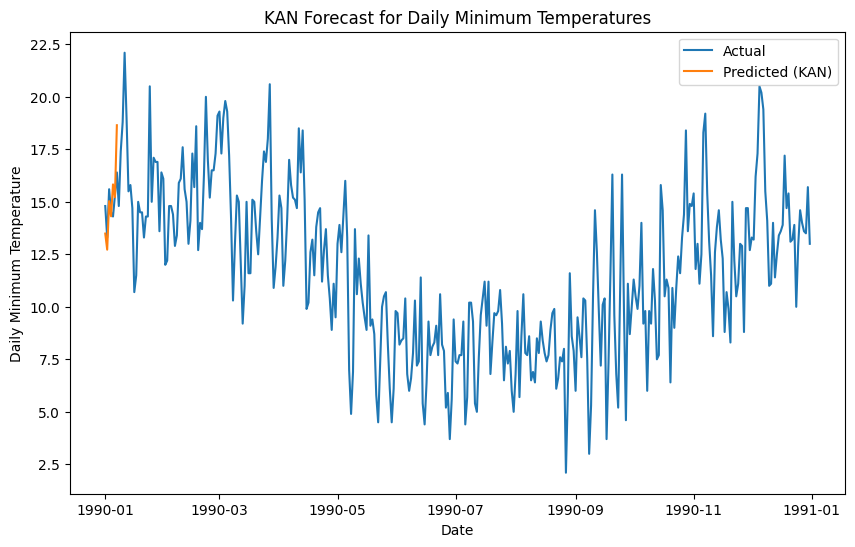

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from neuralforecast import NeuralForecast
from neuralforecast.models import KAN

# Load the dataset
df = pd.read_csv("datasets/dailymintemp.csv")
df = df.rename(columns={"Date": "ds", "Daily minimum temperatures": "y"})
df["unique_id"] = "TempSeries"
df["ds"] = pd.to_datetime(df["ds"])

# Split into training and testing sets
train_df = df[df["ds"] < "1990-01-01"]
test_df = df[df["ds"] >= "1990-01-01"]

# Define forecast horizon
horizon = 7  # Predicting the next week

# Configure the KAN model
kan_model = KAN(
    h=horizon,
    input_size=2 * horizon,
    scaler_type='standard',
    max_steps=1000,
    early_stop_patience_steps=3
)

# Initialize NeuralForecast
nf = NeuralForecast(models=[kan_model], freq='D')

# Calculate validation size
val_size = int(0.1 * len(train_df))

# Train the model (pass val_size)
nf.fit(df=train_df, val_size=val_size)

# Generate predictions
neural_preds = nf.predict(futr_df=test_df[['unique_id', 'ds']])

# Merge predictions with actual data
results = pd.merge(test_df, neural_preds, on=['unique_id', 'ds'], how='left')

# Visualize the results
plt.figure(figsize=(10, 6))
plt.plot(results['ds'], results['y'], label='Actual')
plt.plot(results['ds'], results['KAN'], label='Predicted (KAN)')
plt.legend()
plt.xlabel('Date')
plt.ylabel('Daily Minimum Temperature')
plt.title('KAN Forecast for Daily Minimum Temperatures')
plt.show()


In [1]:
# Generate predictions on the test set
neural_preds = nf.predict(futr_df=test_df[['unique_id', 'ds']])

# Merge predictions with the actual test data for evaluation
results = pd.merge(test_df, neural_preds, on=['unique_id', 'ds'], how='left')


NameError: name 'nf' is not defined